 # By: Hadeel Sameh Hassan 

In [1]:
import pandas as pd
df=pd.read_csv('Churn_Modelling.csv')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data = df.groupby(['Geography'])
data.count()['RowNumber']

Geography
France     5014
Germany    2509
Spain      2477
Name: RowNumber, dtype: int64

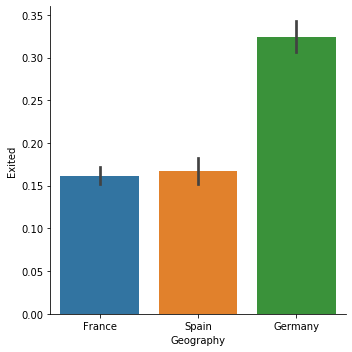

In [7]:
sns.catplot(x = "Geography", y = "Exited", data = df, kind = "bar", height = 5)

# conclusion 1
## we have 13 feature and  1 label
## data has  3 categorical features
## classification is binary (0 or 1 )

## dealing with categories :
### we can drop columns 'surname' as it will not affect our model 
### we can also drop ''RowNumber'' column as it is only indexing
### we will drop also ''CustomerId'' as it may cause bias to our model

In [8]:
df.drop(["Surname","RowNumber","CustomerId"],axis = 1,inplace = True)

### maping Gender Column to 0 for males and 1 for females


In [9]:
dic={'Female' :1 ,'Male' :0}
df['Gender']=df['Gender'].map(dic)

### Do OneHotEncodee for ''Geography'' Column then drop it

In [10]:
dic={'France' :1 ,'Germany' :0 ,'Spain':0}
df['France']=df['Geography'].map(dic)

In [11]:
dic_1={'France' :0 ,'Germany' :1 ,'Spain':0}
df['Germany']=df['Geography'].map(dic_1)

In [12]:
dic_2={'France' :1 ,'Germany' :0 ,'Spain':0}
df['Spain']=df['Geography'].map(dic_2)

In [13]:
df.drop(["Geography"],axis = 1,inplace = True)

In [14]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,1
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,1
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,0


In [15]:
# check if columns has missing values 
a=[]
a=df.columns
for i in a:
    print(f'does column {i} has null values? {df[i].isnull().any()}')


does column CreditScore has null values? False
does column Gender has null values? False
does column Age has null values? False
does column Tenure has null values? False
does column Balance has null values? False
does column NumOfProducts has null values? False
does column HasCrCard has null values? False
does column IsActiveMember has null values? False
does column EstimatedSalary has null values? False
does column Exited has null values? False
does column France has null values? False
does column Germany has null values? False
does column Spain has null values? False


# conclusion 2
## Data has no missing values 

In [16]:
data = df.groupby(['Exited'])
data.count()['NumOfProducts']

Exited
0    7963
1    2037
Name: NumOfProducts, dtype: int64

# Conclusion 3
## data is not Balanced

In [17]:
age = df[df['Age'] < 18]
age

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain


# conclusion 4
### customers are with age > 18

In [18]:
young_people = df[df['Age'] <= 45 ]
young_people = young_people[young_people['Age'] > 18 ]
young_people

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,1
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,1
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,1
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,1
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [19]:
old_people = df[df['Age'] > 45]
old_people

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
6,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,1
16,653,0,58,1,132602.88,1,1,0,5097.67,1,0,1,0
23,669,0,46,3,0.00,2,0,1,8487.75,0,1,0,1
41,465,1,51,8,122522.32,1,0,0,181297.65,1,1,0,1
42,556,1,61,2,117419.35,1,1,1,94153.83,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,610,0,50,1,113957.01,2,1,0,196526.55,1,0,1,0
9979,677,1,58,1,90022.85,1,0,1,2988.28,0,1,0,1
9982,655,1,46,7,137145.12,1,1,0,115146.40,1,0,1,0
9986,673,0,47,1,183579.54,2,0,1,34047.54,0,0,1,0


In [20]:
young_people.groupby('Exited').count()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
Exited,,,,,,,,,,,,
0,6789,6789,6789,6789,6789,6789,6789,6789,6789,6789,6789,6789
1,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078


In [21]:
old_people.groupby('Exited').count()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
Exited,,,,,,,,,,,,
0,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154
1,957,957,957,957,957,957,957,957,957,957,957,957


# conclusion 5
### most of customers are young  (7867  Vs. 2111 ) or data is biased

In [43]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  LinearSVC
from sklearn.metrics import classification_report

In [44]:
X = df.drop(["Exited"],axis =1 )
Y = df["Exited"]

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

In [46]:
Tree_classifier = tree.DecisionTreeClassifier()
Tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
Tree_predicted=Tree_classifier.predict(X_test)

In [48]:
accuracy_score(Y_test,Tree_predicted )

0.8013333333333333

In [49]:
target_names = ['Not Exited', 'Exited']
print(classification_report(Y_test,Tree_predicted , target_names=target_names))

              precision    recall  f1-score   support

  Not Exited       0.88      0.88      0.88      2415
      Exited       0.49      0.49      0.49       585

    accuracy                           0.80      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.80      0.80      0.80      3000



In [50]:
Logistic=LogisticRegression(random_state=2)
Logistic.fit(X_train, Y_train)

C:\Users\Hadeel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
Lostic_predicted = Logistic.predict(X_test)

In [52]:
accuracy_score(Y_test, Lostic_predicted)

0.79

In [53]:
target_names = ['Not Exited', 'Exited']
print(classification_report(Y_test, Lostic_predicted, target_names=target_names))

              precision    recall  f1-score   support

  Not Exited       0.81      0.97      0.88      2415
      Exited       0.28      0.05      0.08       585

    accuracy                           0.79      3000
   macro avg       0.54      0.51      0.48      3000
weighted avg       0.71      0.79      0.73      3000



In [54]:
support_vector_machine=LinearSVC()
support_vector_machine.fit(X_train, Y_train)

C:\Users\Hadeel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [55]:
SVC_bs_predicted=support_vector_machine.predict(X_test)

In [56]:
accuracy_score(Y_test, SVC_bs_predicted)

0.696

In [57]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [58]:
X_train_as, X_test_as, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=2)

In [59]:
support_vector_machine_scaled=LinearSVC()
support_vector_machine_scaled.fit(X_train_as, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [60]:
SVC_as_predicted=support_vector_machine.predict(X_test_as)

In [61]:
accuracy_score(Y_test, SVC_as_predicted)

0.749

# conclusion6
### scaling features before applying support vector machine model has 
### improved the accuracy as it is sensitive for scaling(69.6 %) Vs.(74.9%)

In [64]:
Y_test
Y_true=np.array(Y_test)

In [67]:
target_names = ['Not Exited', 'Exited']
print(classification_report(Y_test, SVC_as_predicted, target_names=target_names))

              precision    recall  f1-score   support

  Not Exited       0.83      0.86      0.85      2415
      Exited       0.33      0.28      0.30       585

    accuracy                           0.75      3000
   macro avg       0.58      0.57      0.57      3000
weighted avg       0.73      0.75      0.74      3000



### conclusion 7
### we can see that decision tree classifier has the highest f1 score(88%) and the highest accuracy (80.1%)